File found at: C:\Users\Anil\Desktop\Synthetic_2_classifiers.csv


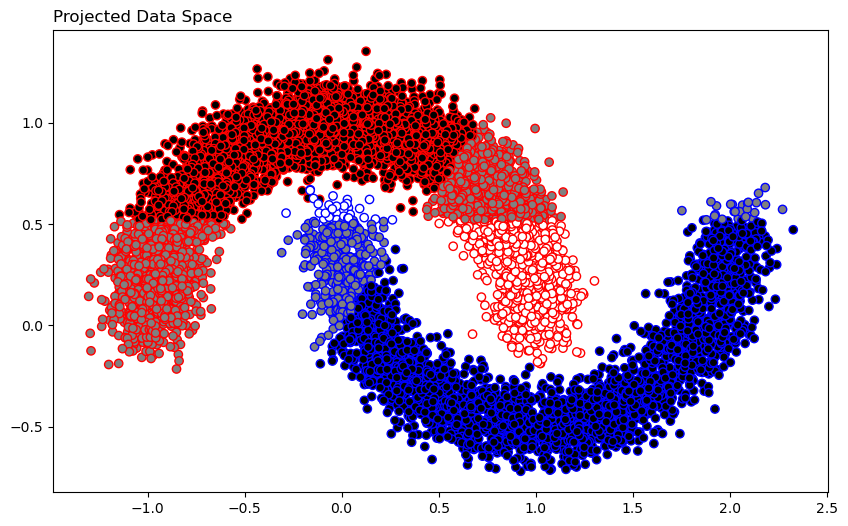

In [1]:
#1a with matplot lib
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory
base_directory = os.path.expanduser('~')  # Home directory

# File name to search for
file_name = 'Synthetic_2_classifiers.csv'

# Search for the file in the base directory and its subdirectories
file_location = None
for root, dirs, files in os.walk(base_directory):
    if file_name in files:
        file_location = os.path.join(root, file_name)
        break

# Check if the file was found and proceed
if file_location:
    print(f"File found at: {file_location}")
    
    # Load the dataset
    df = pd.read_csv(file_location)

    # Define conditions for classification
    correct_both = (df['label'] == df['classifierA_predicted_label']) & (df['label'] == df['classifierB_predicted_label'])
    correct_one = ((df['label'] == df['classifierA_predicted_label']) & (df['label'] != df['classifierB_predicted_label'])) | \
                  ((df['label'] != df['classifierA_predicted_label']) & (df['label'] == df['classifierB_predicted_label']))
    incorrect_both = (df['label'] != df['classifierA_predicted_label']) & (df['label'] != df['classifierB_predicted_label'])

    # Assign colors based on classification
    df['color'] = ['black' if both else 'gray' if one else 'white' for both, one in zip(correct_both, correct_one)]

    # Plot the scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['y'], c=df['color'], edgecolor=df['label'].apply(lambda x: 'red' if x == 'dog' else 'blue'))
    plt.title("Projected Data Space", loc='left')
    plt.show()
else:
    print("File not found!")

In [47]:
   
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import os
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.models import FixedTicker, FuncTickFormatter


# Specify the base directory
base_directory = os.path.expanduser('~')  # Home directory

# File name to search for
file_name = 'Synthetic_2_classifiers.csv'

# Search for the file in the base directory and its subdirectories
file_location = None
for root, dirs, files in os.walk(base_directory):
    if file_name in files:
        file_location = os.path.join(root, file_name)
        break

# Check if the file was found and proceed
if file_location:
    print(f"File found at: {file_location}")
    
    # Load the dataset
    df = pd.read_csv(file_location)
    
    # Total counts of dogs and cats
    total_dog = len(df[df['label'] == 'dog'])
    total_cat = len(df[df['label'] == 'cat'])

    # Classifier A Correctly and Incorrectly Predicted counts
    correct_dog_A = len(df[(df['label'] == 'dog') & (df['classifierA_predicted_label'] == 'dog')])
    correct_cat_A = len(df[(df['label'] == 'cat') & (df['classifierA_predicted_label'] == 'cat')])
    
    # Classifier B Correctly and Incorrectly Predicted counts
    correct_dog_B = len(df[(df['label'] == 'dog') & (df['classifierB_predicted_label'] == 'dog')])
    correct_cat_B = len(df[(df['label'] == 'cat') & (df['classifierB_predicted_label'] == 'cat')])

    
    # Find where both classifiers correctly predicted Dog and cat
    both_correct_dog = len(df[(df['label'] == 'dog') & 
                              (df['classifierA_predicted_label'] == 'dog') & 
                              (df['classifierB_predicted_label'] == 'dog')])

    # Find where both classifiers correctly predicted Cat
    both_correct_cat = len(df[(df['label'] == 'cat') & 
                              (df['classifierA_predicted_label'] == 'cat') & 
                              (df['classifierB_predicted_label'] == 'cat')])

    # Data for Plotting
    categories = ['Classifier A- \ncorrectly predicted Dog',
                  'Classifier B- \ncorrectly predicted Dog',
                  'Classifier A- \ncorrectly predicted Cat',
                  'Classifier B- \ncorrectly predicted Cat']
    
    # Calculate counts for plotting
    grey_counts = [correct_dog_A, correct_dog_B, correct_cat_A, correct_cat_B]
    black_counts = [both_correct_dog, both_correct_dog, both_correct_cat, both_correct_cat]
    
    x_dog = [0.8, 1.2]  # Grouping for dog predictions (Classifier A and B)
    x_cat = [2.8, 3.2]  # Grouping for cat predictions (Classifier A and B)
    x_positions = [0.8, 1.2, 2.8, 3.2] 
    # Create the figure
    output_notebook()
    p = figure(height=600, width=800, title="Assessing Classifiers' Performance for each class.",
               toolbar_location=None, tools="")
    
    # Plot grey bars for correctly predicted labels (by each classifier)
    p.vbar(x=x_dog, top=grey_counts[:2], width=0.3, color='grey')
    p.vbar(x=x_cat, top=grey_counts[2:], width=0.3, color='grey')
    
    # Plot black bars for both classifiers correctly predicted (stacked on top of grey bars)
    p.vbar(x=x_dog, top=black_counts[:2], width=0.3, color='black')
    p.vbar(x=x_cat, top=black_counts[2:], width=0.3, color='black')
    
    
    p.quad(left=[0.5], right=[1.5], bottom=[0], top=[total_dog + 10],  # Set bottom to 0
        fill_color='red', fill_alpha=0.1, line_color='red', line_width=2)

    p.quad(left=[2.5], right=[3.5], bottom=[0], top=[total_cat + 10],  # Set bottom to 0
        fill_color='blue', fill_alpha=0.1, line_color='blue', line_width=2)
    
    labels = ['Classifier A- \ncorrectly predicted Dog', 
          'Classifier B- \ncorrectly predicted Dog',
          'Classifier A- \ncorrectly predicted Cat', 
          'Classifier B- \ncorrectly predicted Cat']
    
    # Set custom tick locations and labels
    p.xaxis.ticker = FixedTicker(ticks=x_positions)
    p.xaxis.formatter = FuncTickFormatter(code="""
        var labels = {'0.8': 'Classifier A- \\ncorrectly \\npredicted Dog',
                      '1.2': 'Classifier B- \\ncorrectly \\npredicted Dog',
                      '2.8': 'Classifier A- \\ncorrectly \\npredicted Cat',
                      '3.2': 'Classifier B- \\ncorrectly \\npredicted Cat'};
        return labels[tick];
    """)
    # Final touches
    p.y_range.start = 0
    p.xgrid.grid_line_color = None
    p.yaxis.axis_label = "Count"

    # Show the plot
    show(p)
    


File found at: C:\Users\Anil\Desktop\Synthetic_2_classifiers.csv


Loading BokehJS ...

In [2]:
import pandas as pd
import os
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, BoxSelectTool, FixedTicker, FuncTickFormatter, CustomJS
from bokeh.layouts import row

# Enable output in notebook
output_notebook()

# Load dataset
base_directory = os.path.expanduser('~')  # Home directory
file_name = 'Synthetic_2_classifiers.csv'

file_location = None
for root, dirs, files in os.walk(base_directory):
    if file_name in files:
        file_location = os.path.join(root, file_name)
        break

if file_location:
    print(f"File found at: {file_location}")

    df = pd.read_csv(file_location)

    cluster = df.copy()

    def assign_color(row):
        correct_both = (row['label'] == row['classifierA_predicted_label']) and (row['label'] == row['classifierB_predicted_label'])
        correct_one = ((row['label'] == row['classifierA_predicted_label']) and (row['label'] != row['classifierB_predicted_label'])) or \
                      ((row['label'] != row['classifierA_predicted_label']) and (row['label'] == row['classifierB_predicted_label']))
        if correct_both:
            return 'black'
        elif correct_one:
            return 'grey'
        else:
            return 'white'

    def assign_edge_color(label):
        return 'red' if label == 'dog' else 'blue'

    cluster['color'] = cluster.apply(assign_color, axis=1)
    cluster['edge_color'] = cluster['label'].apply(assign_edge_color)

    source = ColumnDataSource(cluster)
    scatter_plot = figure(title="Projected Data Space", tools="reset, box_select", width=600, height=400)
    scatter_plot.scatter('x', 'y', color='color', line_color='edge_color', source=source, size=8)
    scatter_plot.add_tools(BoxSelectTool())

    # Initialize bar source with initial data (both counts set to 0)
    bar_source = ColumnDataSource(data=dict(
        x=['Classifier A- \ncorrectly predicted Dog', 'Classifier B- \ncorrectly predicted Dog', 
           'Classifier A- \ncorrectly predicted Cat', 'Classifier B- \ncorrectly predicted Cat'],
        grey_counts=[0, 0, 0, 0],
        black_counts=[0, 0, 0, 0]
    ))

    bar_plot = figure(height=400, width=800, title="Assessing Classifier's Performance for Red Cluster.",
                      toolbar_location=None, tools="", x_range=bar_source.data['x'])
    
    # Plot grey bars for correctly predicted labels (by each classifier)
    bar_source.data['x'] = [0.8, 1.2, 2.8, 3.2]
    bar_plot.vbar(x='x', top='grey_counts', width=0.3, color='grey', source=bar_source)
    
    # Plot black bars for both classifiers correctly predicted (stacked on top of grey bars)
    bar_plot.vbar(x='x', top='black_counts', width=0.3, color='black', source=bar_source)

    bar_plot.quad(left=[0.5], right=[1.5], bottom=[0], top=[len(df[df['label'] == 'dog']) + 10],
                  fill_color='red', fill_alpha=0.1, line_color='red', line_width=2)
    bar_plot.quad(left=[2.5], right=[3.5], bottom=[0], top=[len(df[df['label'] == 'cat']) + 10],
                  fill_color='blue', fill_alpha=0.1, line_color='blue', line_width=2)
    
    bar_plot.xaxis.ticker = FixedTicker(ticks=[0.8, 1.2, 2.8, 3.2])
    bar_plot.xaxis.formatter = FuncTickFormatter(code="""
        var labels = {'0.8': 'Classifier A- \\ncorrectly \\npredicted Dog',
                      '1.2': 'Classifier B- \\ncorrectly \\npredicted Dog',
                      '2.8': 'Classifier A- \\ncorrectly \\npredicted Cat',
                      '3.2': 'Classifier B- \\ncorrectly \\npredicted Cat'};
        return labels[tick];
    """)
    bar_plot.y_range.start = 0
    bar_plot.xgrid.grid_line_color = None
    bar_plot.yaxis.axis_label = "Count"

    source.selected.js_on_change('indices', CustomJS(args=dict(source=source, bar_source=bar_source), code="""
        console.log('JavaScript callback triggered');
        var indices = cb_obj.indices;
        console.log('Selected indices:', indices);
    
        var data = source.data;
        var grey_dog_A = 0, grey_dog_B = 0, grey_cat_A = 0, grey_cat_B = 0;
        var both_correct_dog = 0, both_correct_cat = 0;
    
        // Iterate through selected points
        for (var i = 0; i < indices.length; i++) {
            var idx = indices[i];
            var label = data['label'][idx];
            var classifierA = data['classifierA_predicted_label'][idx];
            var classifierB = data['classifierB_predicted_label'][idx];
    
            // Update counts for dog and cat classifications
            if (label == 'dog') {
                // Classifier A correctly predicted dog
                if (classifierA == 'dog') grey_dog_A++;
                // Classifier B correctly predicted dog
                if (classifierB == 'dog') grey_dog_B++;
                // Both classifiers correctly predicted dog
                if (classifierA == 'dog' && classifierB == 'dog') both_correct_dog++;
            } else if (label == 'cat') {
                // Classifier A correctly predicted cat
                if (classifierA == 'cat') grey_cat_A++;
                // Classifier B correctly predicted cat
                if (classifierB == 'cat') grey_cat_B++;
                // Both classifiers correctly predicted cat
                if (classifierA == 'cat' && classifierB == 'cat') both_correct_cat++;
            }
        }
    
        // Calculate individual grey counts (subtracting the overlap)
        var grey_counts = [grey_dog_A - both_correct_dog, grey_dog_B - both_correct_dog, 
                           grey_cat_A - both_correct_cat, grey_cat_B - both_correct_cat];
    
        // Calculate black counts (both classifiers correct)
        var black_counts = [both_correct_dog, both_correct_dog, both_correct_cat, both_correct_cat];
    
        // Log counts for debugging
        console.log('Grey Counts (Classifier A, Classifier B):', grey_counts);
        console.log('Black Counts (Both classifiers correct):', black_counts);
    
        // Update the bar chart data in place
        bar_source.data['grey_counts'] = grey_counts;
        bar_source.data['black_counts'] = black_counts;
    
        // Emit changes
        bar_source.change.emit();
    """));

    layout = row(scatter_plot, bar_plot)

    # Show the plot
    show(layout)
else:
    print("File not found!")


Loading BokehJS ...

File found at: C:\Users\Anil\Desktop\Synthetic_2_classifiers.csv


File found at: C:\Users\Anil\Desktop\Synthetic_2_classifiers.csv


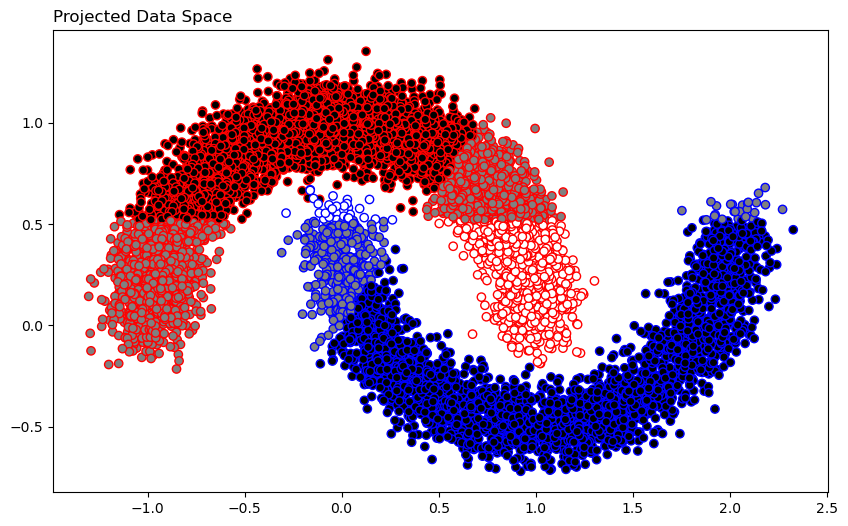

In [53]:
#1a with matplot lib
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory
base_directory = os.path.expanduser('~')  # Home directory

# File name to search for
file_name = 'Synthetic_2_classifiers.csv'

# Search for the file in the base directory and its subdirectories
file_location = None
for root, dirs, files in os.walk(base_directory):
    if file_name in files:
        file_location = os.path.join(root, file_name)
        break

# Check if the file was found and proceed
if file_location:
    print(f"File found at: {file_location}")
    
    # Load the dataset
    df = pd.read_csv(file_location)

    # Define conditions for classification
    correct_both = (df['label'] == df['classifierA_predicted_label']) & (df['label'] == df['classifierB_predicted_label'])
    correct_one = ((df['label'] == df['classifierA_predicted_label']) & (df['label'] != df['classifierB_predicted_label'])) | \
                  ((df['label'] != df['classifierA_predicted_label']) & (df['label'] == df['classifierB_predicted_label']))
    incorrect_both = (df['label'] != df['classifierA_predicted_label']) & (df['label'] != df['classifierB_predicted_label'])

    # Assign colors based on classification
    df['color'] = ['black' if both else 'gray' if one else 'white' for both, one in zip(correct_both, correct_one)]

    # Plot the scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['y'], c=df['color'], edgecolor=df['label'].apply(lambda x: 'red' if x == 'dog' else 'blue'))
    plt.title("Projected Data Space", loc='left')
    plt.show()
else:
    print("File not found!")